In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Categorical Columns: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# Cardinality & proportion of categorical columns
for col in categorical_cols:   
    print(f"Cardinality of {col}: {df[col].nunique()}")
    print(f"Proportion of {col}: \n{df[col].value_counts(normalize=True)*100}\n")
    print("=" * 50)

Cardinality of case_id: 25480
Proportion of case_id: 
case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64

Cardinality of continent: 6
Proportion of continent: 
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

Cardinality of education_of_employee: 4
Proportion of education_of_employee: 
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64

Cardinality of has_job_experience: 2
Proportion of has_job_experience: 
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64

**Observations**:

- **`case_id`** is a unique identifier (25,480 unique values) and has no predictive value.

- **Target variable (`case_status`)** shows moderate imbalance (67% Certified, 33% Denied).

- **Continent** (66% from Asia) has potential regional bias.

- Some features such as **`requires_job_training`, `unit_of_wage`, and `full_time_position`** are highly imbalanced.



## Univariate Analysis

### Numerical Features

In [8]:
print("Numerical Features:")
for col in numerical_cols:
    print(col)

Numerical Features:
no_of_employees
yr_of_estab
prevailing_wage


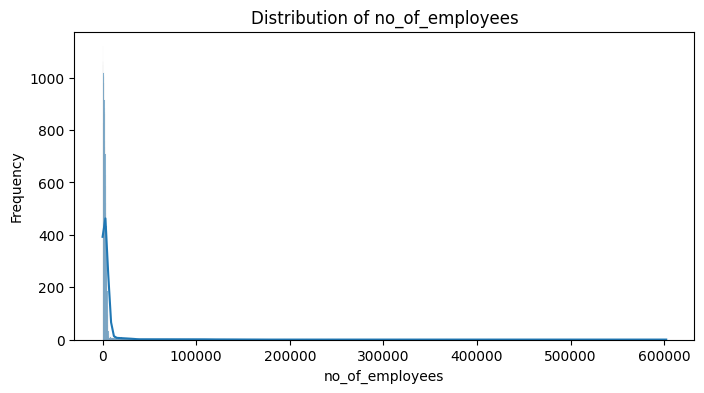

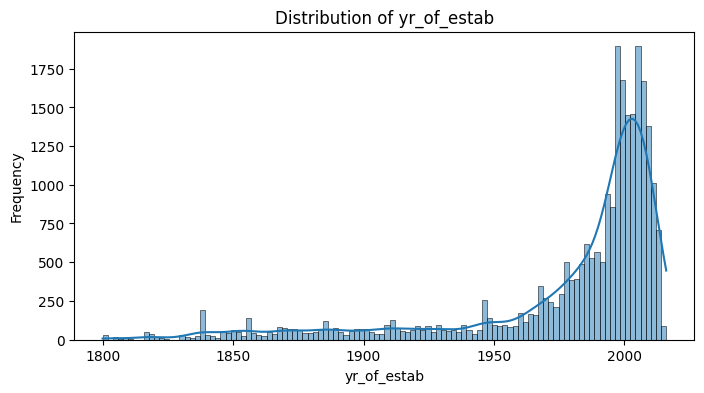

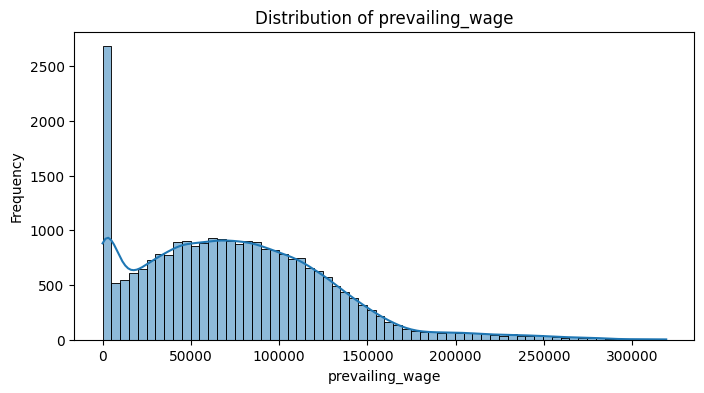

In [9]:
# Plot distribnution of numerical features
for col in numerical_cols:  
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Categorical Features

In [10]:
# delete case_id 
categorical_cols.remove("case_id")

print("Categorical Features:")
for col in categorical_cols:
    print(col)

Categorical Features:
continent
education_of_employee
has_job_experience
requires_job_training
region_of_employment
unit_of_wage
full_time_position
case_status


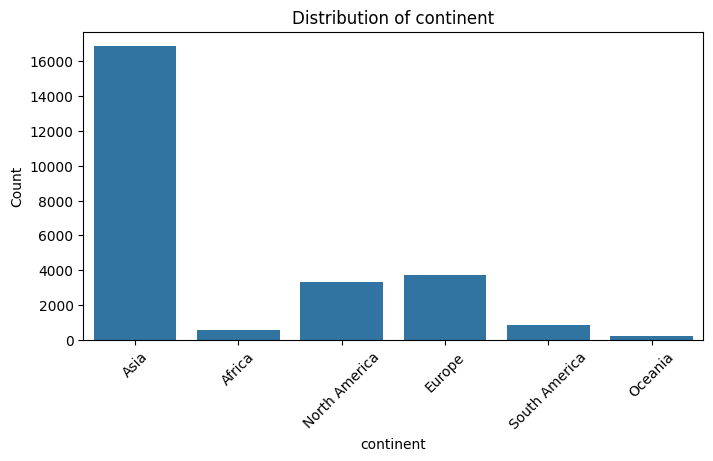

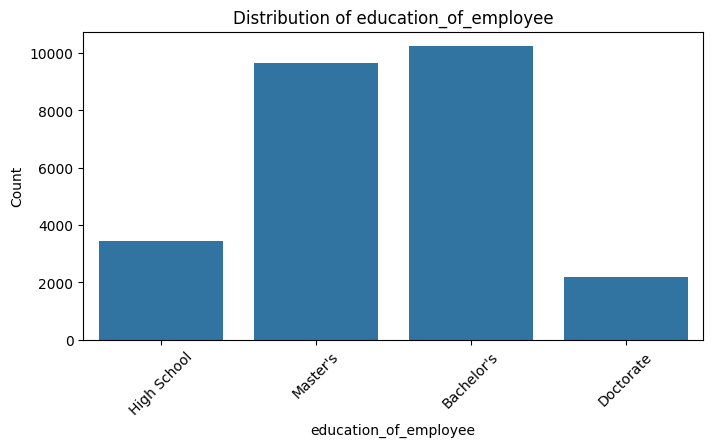

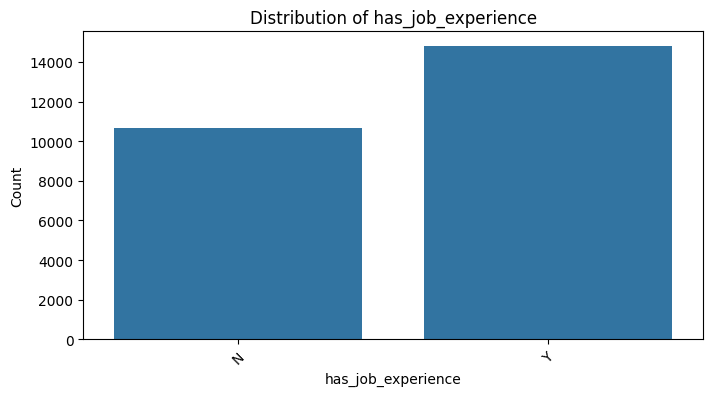

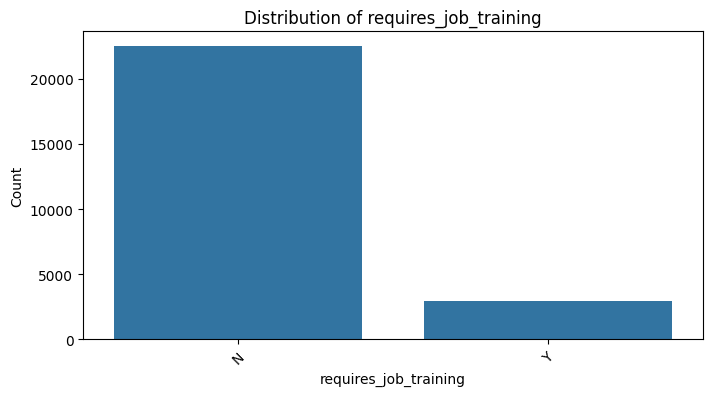

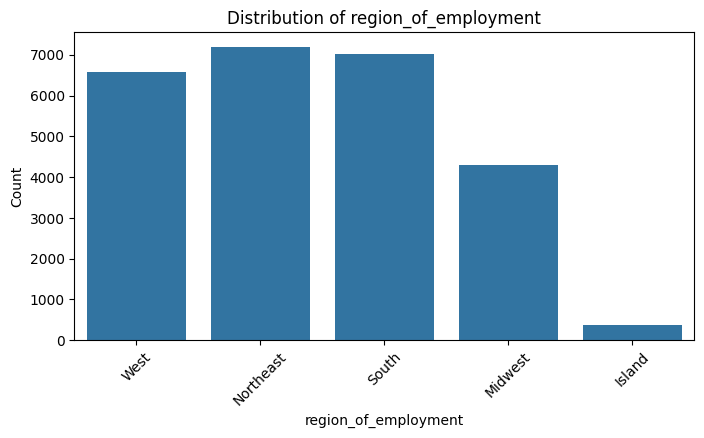

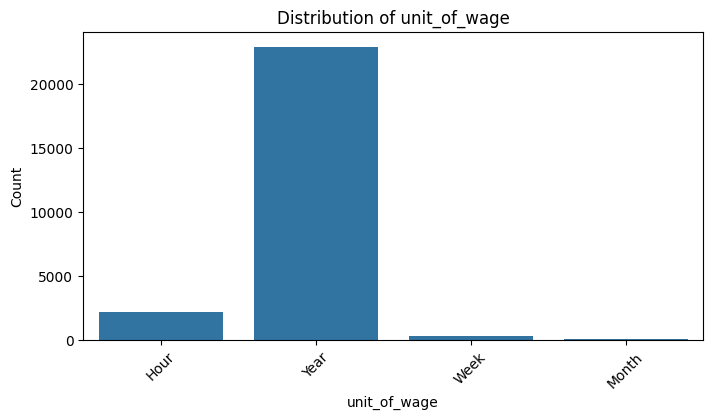

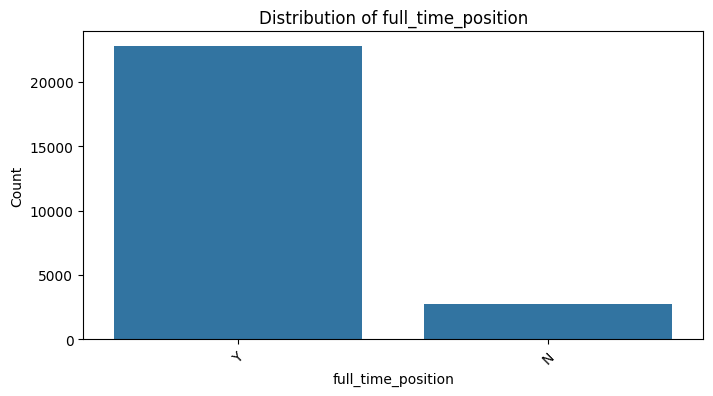

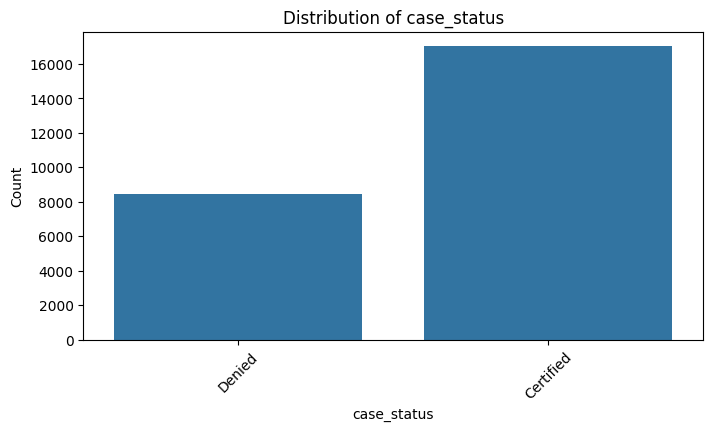

In [11]:
# Plotting distributions of Categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
discrete_cols = [col for col in numerical_cols if df[col].nunique() < 10]
print("Discrete Numerical Features:", discrete_cols)    
continuous_cols = [col for col in numerical_cols if df[col].nunique() >= 10]
print("Continuous Numerical Features:", continuous_cols)

Discrete Numerical Features: []
Continuous Numerical Features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [15]:
# Check for Multicollinearity

from scipy.stats import chi2_contingency
chi2_test = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['case_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        chi2_test.append((col, chi2, p, f"Reject Null Hypothesis"))
    else:
        chi2_test.append((col, chi2, p, f"Fail to Reject Null Hypothesis"))

result = pd.DataFrame(chi2_test, columns=['Feature', 'Chi2 Statistic', 'P-value', 'Conclusion'])
result
        


,Feature,Chi2 Statistic,P-value,Conclusion
0,continent,351.380408,8.828798e-74,Reject Null Hypothesis
1,education_of_employee,2772.207275,0.000000e+00,Reject Null Hypothesis
2,has_job_experience,940.058096,1.922560e-206,Reject Null Hypothesis
3,requires_job_training,1.752484,1.855647e-01,Fail to Reject Null Hypothesis
4,region_of_employment,298.450836,2.338664e-63,Reject Null Hypothesis
5,unit_of_wage,1108.507062,5.193385e-240,Reject Null Hypothesis
6,full_time_position,4.029932,4.469975e-02,Reject Null Hypothesis
7,case_status,25475.491853,0.000000e+00,Reject Null Hypothesis


**Observation**: `requires_job_training` column fails to reject the null hypothesis, it doesn't correlate with target column.

#### Distribution of Numerical Columns by target column

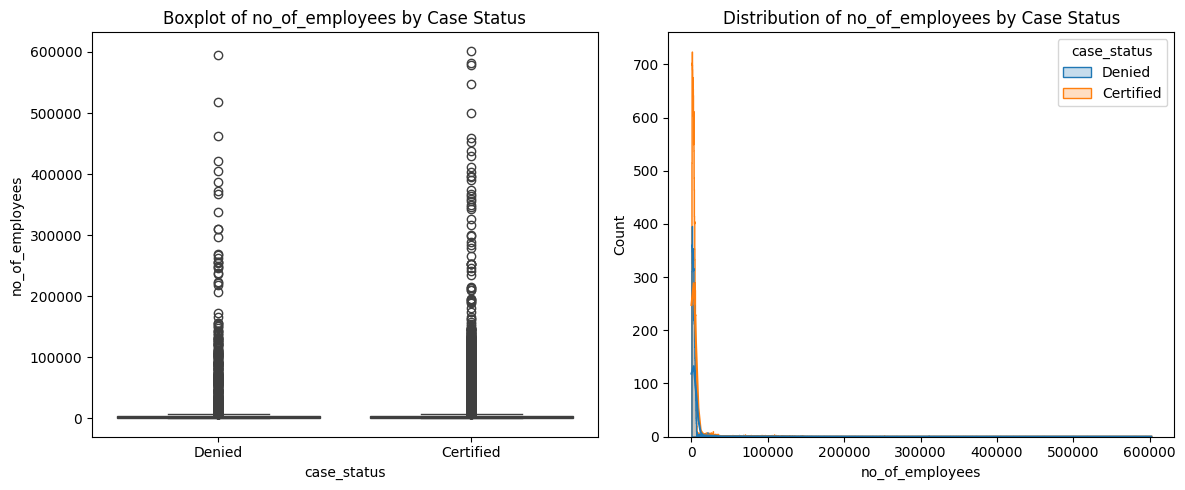

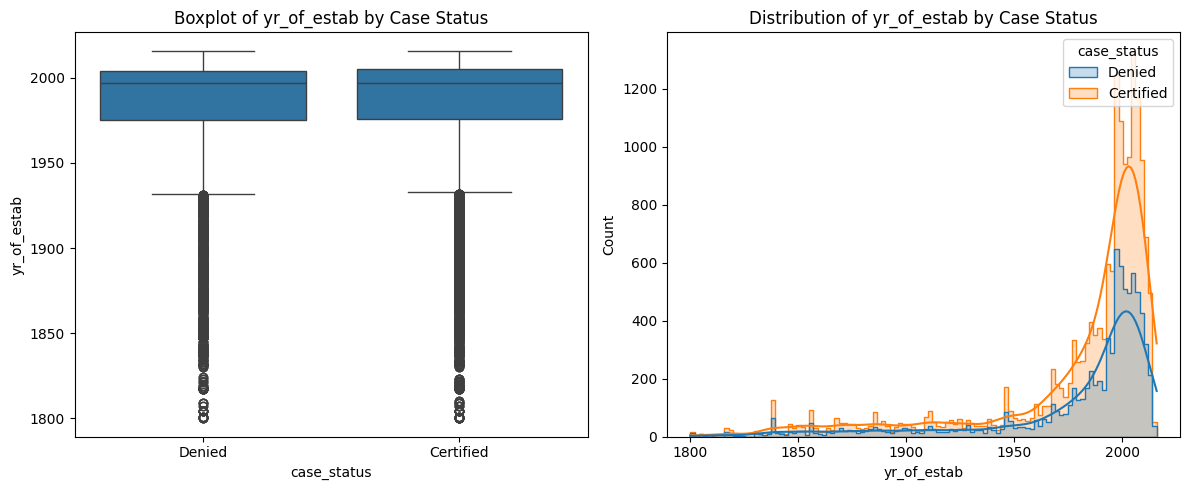

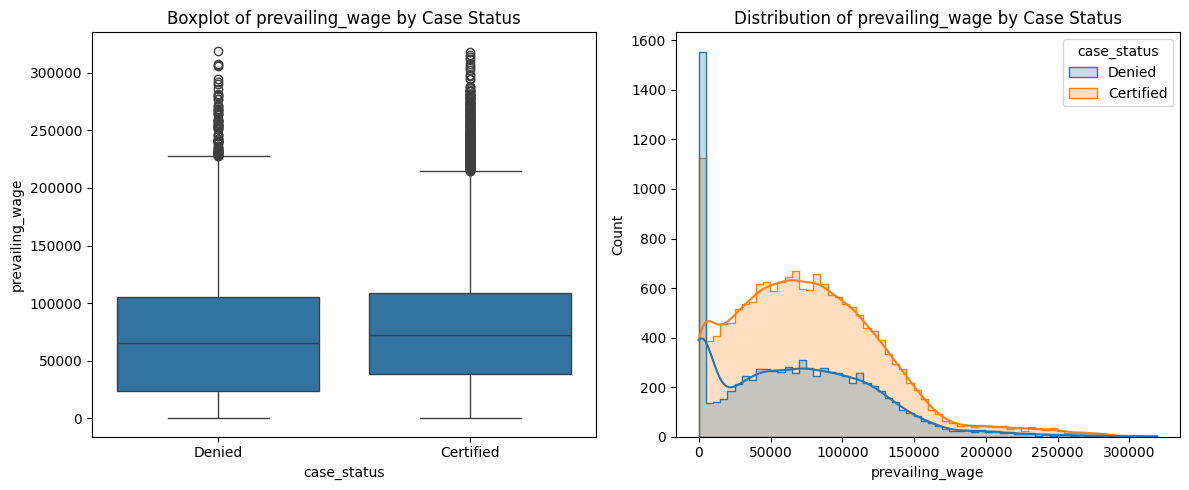

In [17]:

# plot boxplot and histogram for each numerical column grouped by case_status
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='case_status', y=col, data=df)
    plt.title(f"Boxplot of {col} by Case Status")
    
    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=col, hue='case_status', kde=True, element="step")
    plt.title(f"Distribution of {col} by Case Status")
    
    plt.tight_layout()
    plt.show()


* **No of Employees has many outliers which can be Handled in Feature Engineering and `no_of_employees` is Right Skewed.**
* **`yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.**
* **`prevailing_wage` is right skewed with outliers above upper bound of box plot.**
* **The `case_id` column can be deleted because each row has unique values.**
* **The `case_status` column is the target to predict.**


### Target Column Analysis

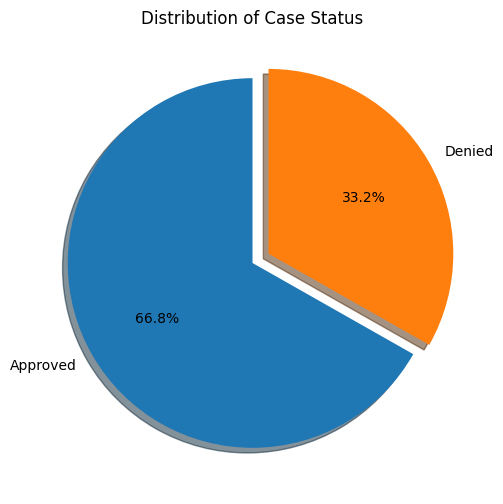

In [22]:
percentage = df.case_status.value_counts(normalize=True) * 100
labels  = ['Approved', 'Denied']

plt.figure(figsize=(6, 6))
plt.pie(percentage, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0, 0.1), shadow=True)
plt.title("Distribution of Case Status")
plt.show()

#### Does COntinent have any impact on case_status?

In [36]:
(df.groupby('continent')['case_status'].value_counts(normalize=True)*100).unstack().sort_values(by='Certified', ascending=False)   

case_status,Certified,Denied
continent,,
Europe,79.233655,20.766345
Africa,72.050817,27.949183
Asia,65.310480,34.689520
Oceania,63.541667,36.458333
North America,61.877278,38.122722
South America,57.863850,42.136150


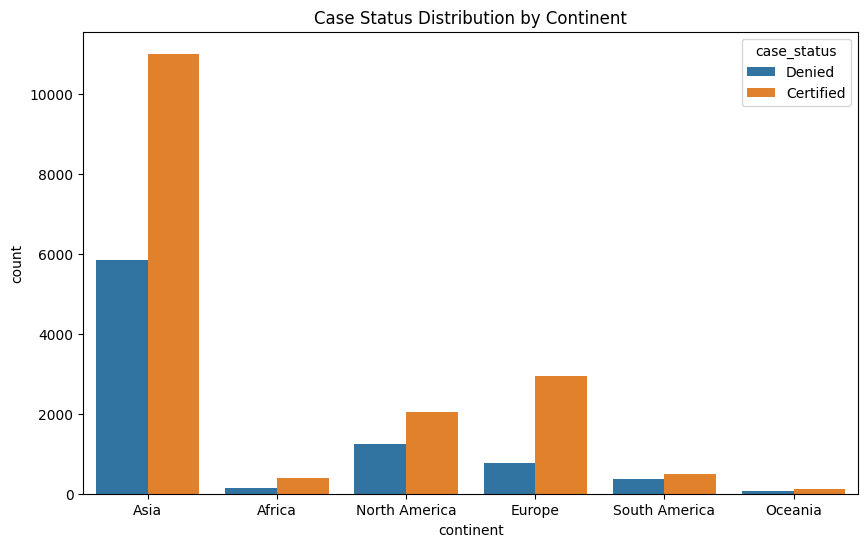

In [31]:

plt.figure(figsize=(10, 6))
sns.countplot(x='continent', hue='case_status', data=df)
plt.title("Case Status Distribution by Continent")
plt.show()

#### Education vs Case_Satus

In [38]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).unstack().sort_values(by='Certified', ascending=False)   

case_status,Certified,Denied
education_of_employee,,
Doctorate,0.872263,0.127737
Master's,0.786278,0.213722
Bachelor's,0.622142,0.377858
High School,0.340351,0.659649


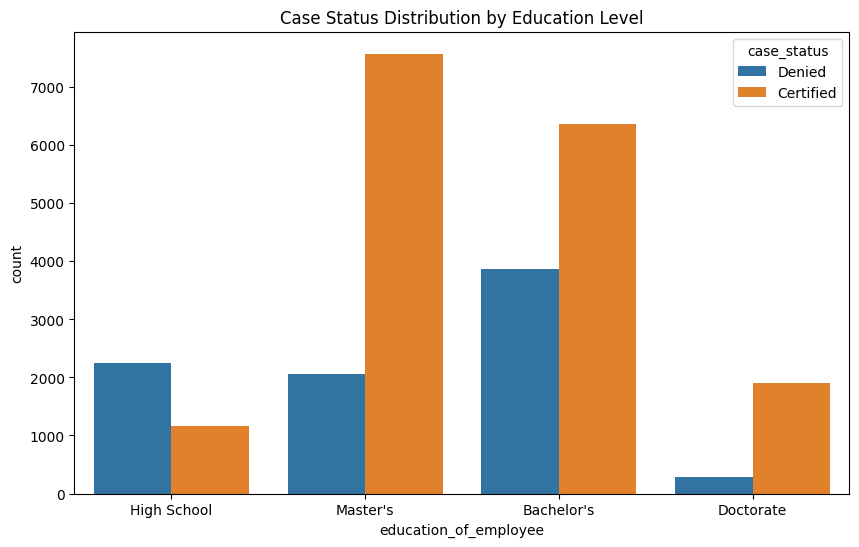

In [39]:
# Plot 
plt.figure(figsize=(10, 6))
sns.countplot(x='education_of_employee', hue='case_status', data=df)
plt.title("Case Status Distribution by Education Level")
plt.show()

#### Work Experience vs Case status

In [40]:
df.groupby("has_job_experience")['case_status'].value_counts(normalize=True).unstack().sort_values(by='Certified', ascending=False)

case_status,Certified,Denied
has_job_experience,,
Y,0.744764,0.255236
N,0.561341,0.438659


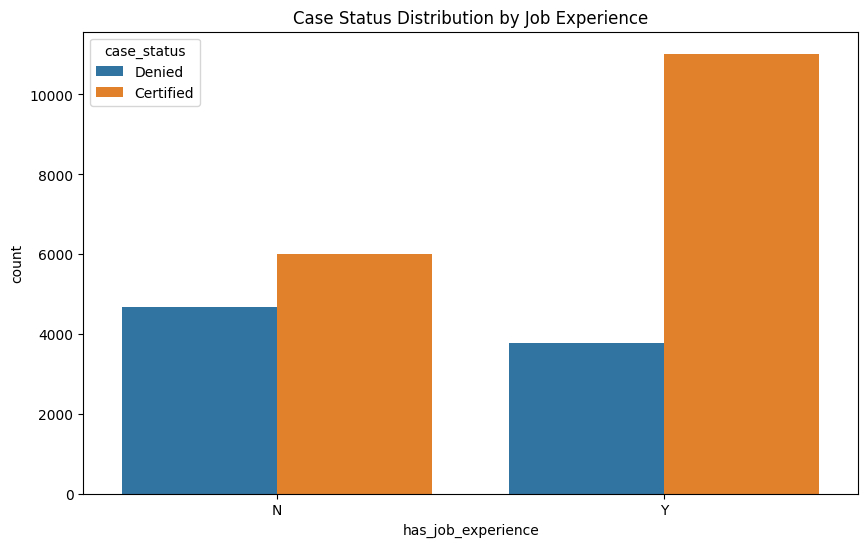

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='has_job_experience', hue='case_status', data=df)
plt.title("Case Status Distribution by Job Experience")
plt.show()

#### Requires job training vs Case status

In [42]:
df.groupby("requires_job_training")['case_status'].value_counts(normalize=True).unstack().sort_values(by='Certified', ascending=False)

case_status,Certified,Denied
requires_job_training,,
Y,0.678849,0.321151
N,0.666459,0.333541


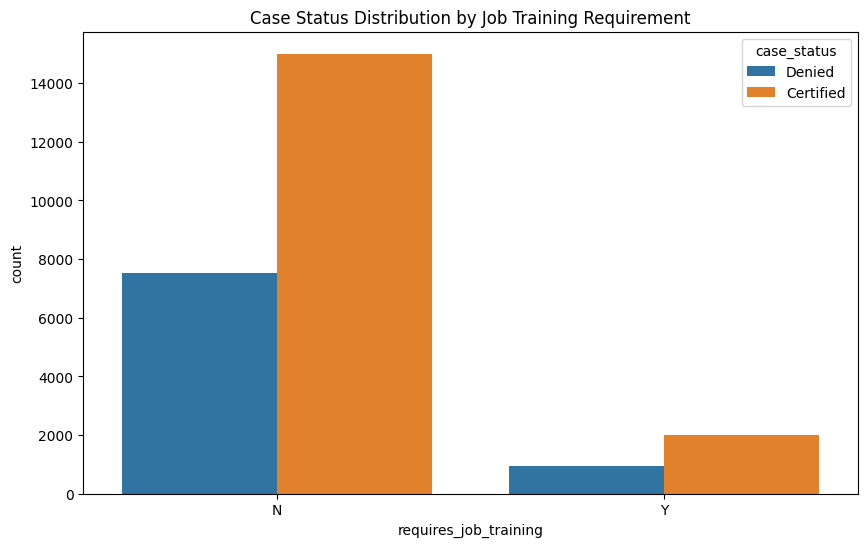

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='requires_job_training', hue='case_status', data=df)
plt.title("Case Status Distribution by Job Training Requirement")
plt.show()

#### No of Employees vs Case Status

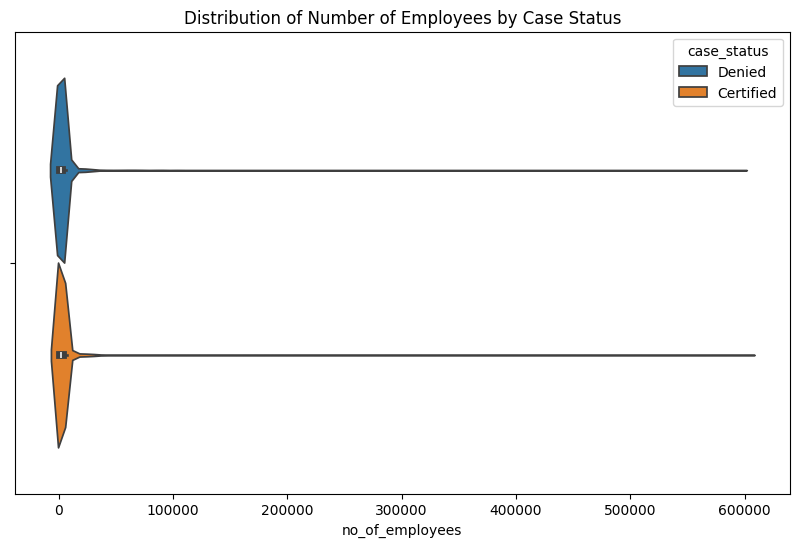

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='no_of_employees', hue='case_status')
plt.title("Distribution of Number of Employees by Case Status")
plt.show()

#### Wages vs Case Status

In [48]:
df.groupby("unit_of_wage")['case_status'].value_counts(normalize=True).unstack().sort_values(by='Certified', ascending=False)   

case_status,Certified,Denied
unit_of_wage,,
Year,0.698850,0.301150
Week,0.621324,0.378676
Month,0.617978,0.382022
Hour,0.346314,0.653686


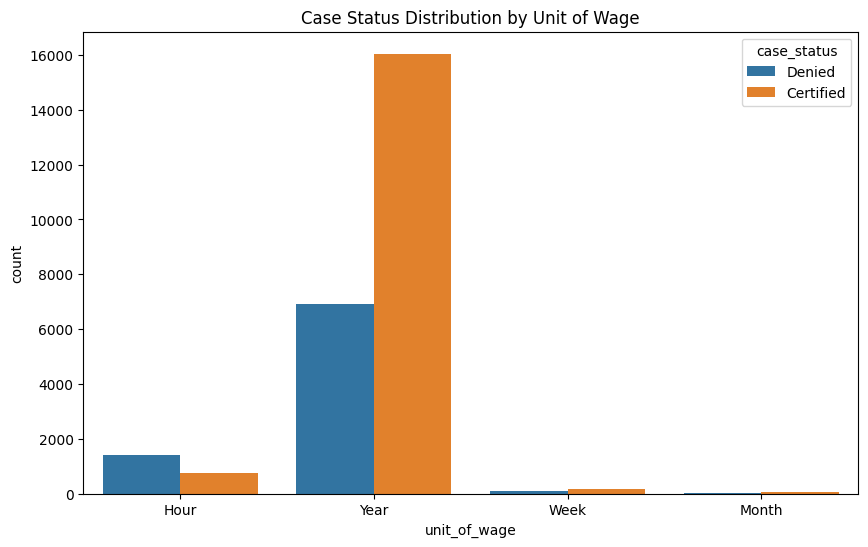

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x="unit_of_wage", hue='case_status', data=df)
plt.title("Case Status Distribution by Unit of Wage")
plt.show()

#### Region vs Case status

In [50]:
df.groupby("region_of_employment")['case_status'].value_counts(normalize=True).unstack().sort_values(by='Certified', ascending=False)

case_status,Certified,Denied
region_of_employment,,
Midwest,0.755282,0.244718
South,0.700157,0.299843
Northeast,0.629048,0.370952
West,0.622533,0.377467
Island,0.602667,0.397333


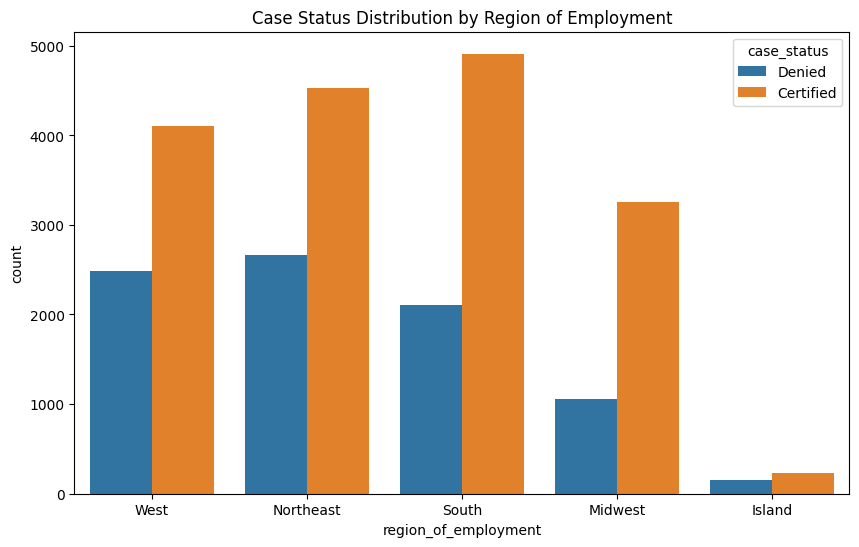

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x="region_of_employment", hue='case_status', data=df)
plt.title("Case Status Distribution by Region of Employment")
plt.show()

#### Prevailing Wage vs Case status

In [52]:
df.groupby("prevailing_wage")['case_status'].value_counts(normalize=True).unstack().sort_values(by='Certified', ascending=False)

case_status,Certified,Denied
prevailing_wage,,
2.1367,1.0,NaN
95806.5700,1.0,NaN
95728.3400,1.0,NaN
95729.3400,1.0,NaN
95732.8700,1.0,NaN
...,...,...
294258.8000,NaN,1.0
306206.6700,NaN,1.0
306982.2800,NaN,1.0


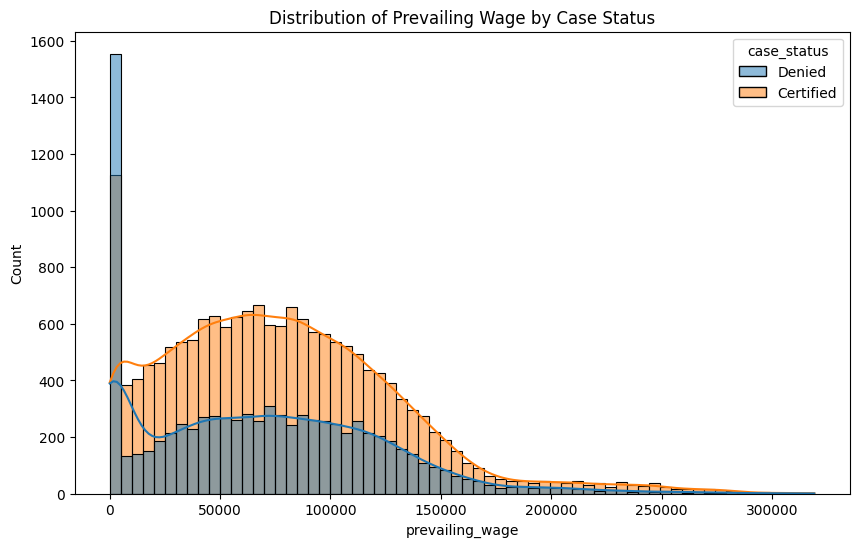

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='prevailing_wage', hue='case_status', kde=True, element="bars")
plt.title("Distribution of Prevailing Wage by Case Status")
plt.show()

#### Year of Establishment vs Case Status

In [55]:
df.groupby("yr_of_estab")['case_status'].value_counts(normalize=True).unstack().sort_values(by='Certified', ascending=False)

case_status,Certified,Denied
yr_of_estab,,
1810,1.000000,NaN
1846,1.000000,NaN
1918,0.857143,0.142857
1889,0.857143,0.142857
1842,0.833333,0.166667
...,...,...
1894,0.454545,0.545455
1843,0.400000,0.600000
1841,0.333333,0.666667


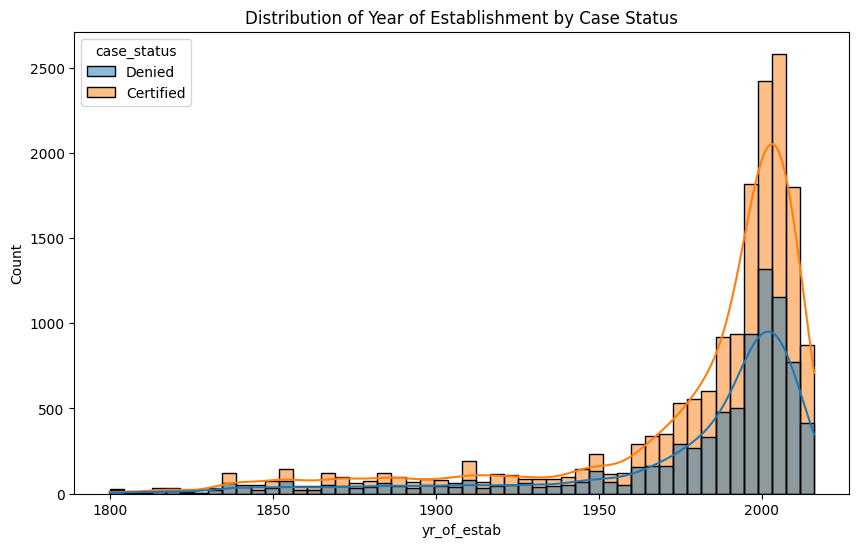

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='yr_of_estab', hue='case_status', bins=50, kde=True, element="bars")
plt.title("Distribution of Year of Establishment by Case Status")
plt.show()

## Conclusion:

In [ ]:
sig = result[result['Conclusion'].str.contains('Reject Null Hypothesis')]['Feature'].tolist()
sig = [f for f in sig if f != 'case_status']
insig = result[result['Conclusion'].str.contains('Fail to Reject')]['Feature'].tolist()


print(f"Target imbalance: Certified {percentage['Certified']:.1f}%, Denied {percentage['Denied']:.1f}%.")
print("Significant categorical predictors (chi2):", ", ".join(sig))
print("Non-significant categorical predictors:", ", ".join(insig) if insig else "None")
print("Continuous features with skew/outliers:", ", ".join(continuous_cols))
print("Key actions: drop case_id; handle class imbalance; encode categorical features; treat outliers and scale continuous features; proceed with feature selection and modeling.")

Target imbalance: Certified 66.8%, Denied 33.2%.
Significant categorical predictors (chi2): continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position
Non-significant categorical predictors: requires_job_training
Continuous features with skew/outliers: no_of_employees, yr_of_estab, prevailing_wage
Key actions: drop case_id; handle class imbalance; encode categorical features; treat outliers and scale continuous features; proceed with feature selection and modeling.


##